<a href="https://colab.research.google.com/github/Aiemu/colab-log/blob/master/yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

This is the **official YOLOv5 🚀 notebook** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!cd yolov5
!pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu111 (Tesla K80)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Train


In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
     |████████████████████████████████| 180 kB 44.9 MB/s 
     |████████████████████████████████| 139 kB 48.2 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs

!python yolov5/train.py --img 640 --batch 15 --epochs 300 --data ./data/cover.yaml --cfg yolov5l.yaml --weights yolov5l.pt --nosave --cache

wandb: Currently logged in as: aiemu (use `wandb login --relogin` to force relogin)
train: weights=yolov5l.pt, cfg=yolov5l.yaml, data=./data/cover.yaml, hyp=yolov5/data/hyps/hyp.scratch.yaml, epochs=300, batch_size=15, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0

# Val

In [ ]:
!python yolov5/val.py --weights ./yolov5/runs/train/exp7/weights/last.pt --data data/cover.yaml --iou 0.65 --half

val: data=data/cover.yaml, weights=['./yolov5/runs/train/exp7/weights/last.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=True
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients
val: Scanning 'data/labels/val.cache' images and labels... 23 found, 0 missing, 0 empty, 0 corrupted: 100% 23/23 [00:00<?, ?it/s]
val: WARNING: data/images/val/IMG_20211015_095317.jpg: corrupt JPEG restored and saved
val: WARNING: data/images/val/IMG_20211015_104538.jpg: corrupt JPEG restored and saved
val: WARNING: data/images/val/IMG_20211015_110534.jpg: corrupt JPEG restored and saved
val: WARNING: data/images/val/IMG_20211015_111449.jpg: corrupt JPEG restored and saved
               Class     Imag

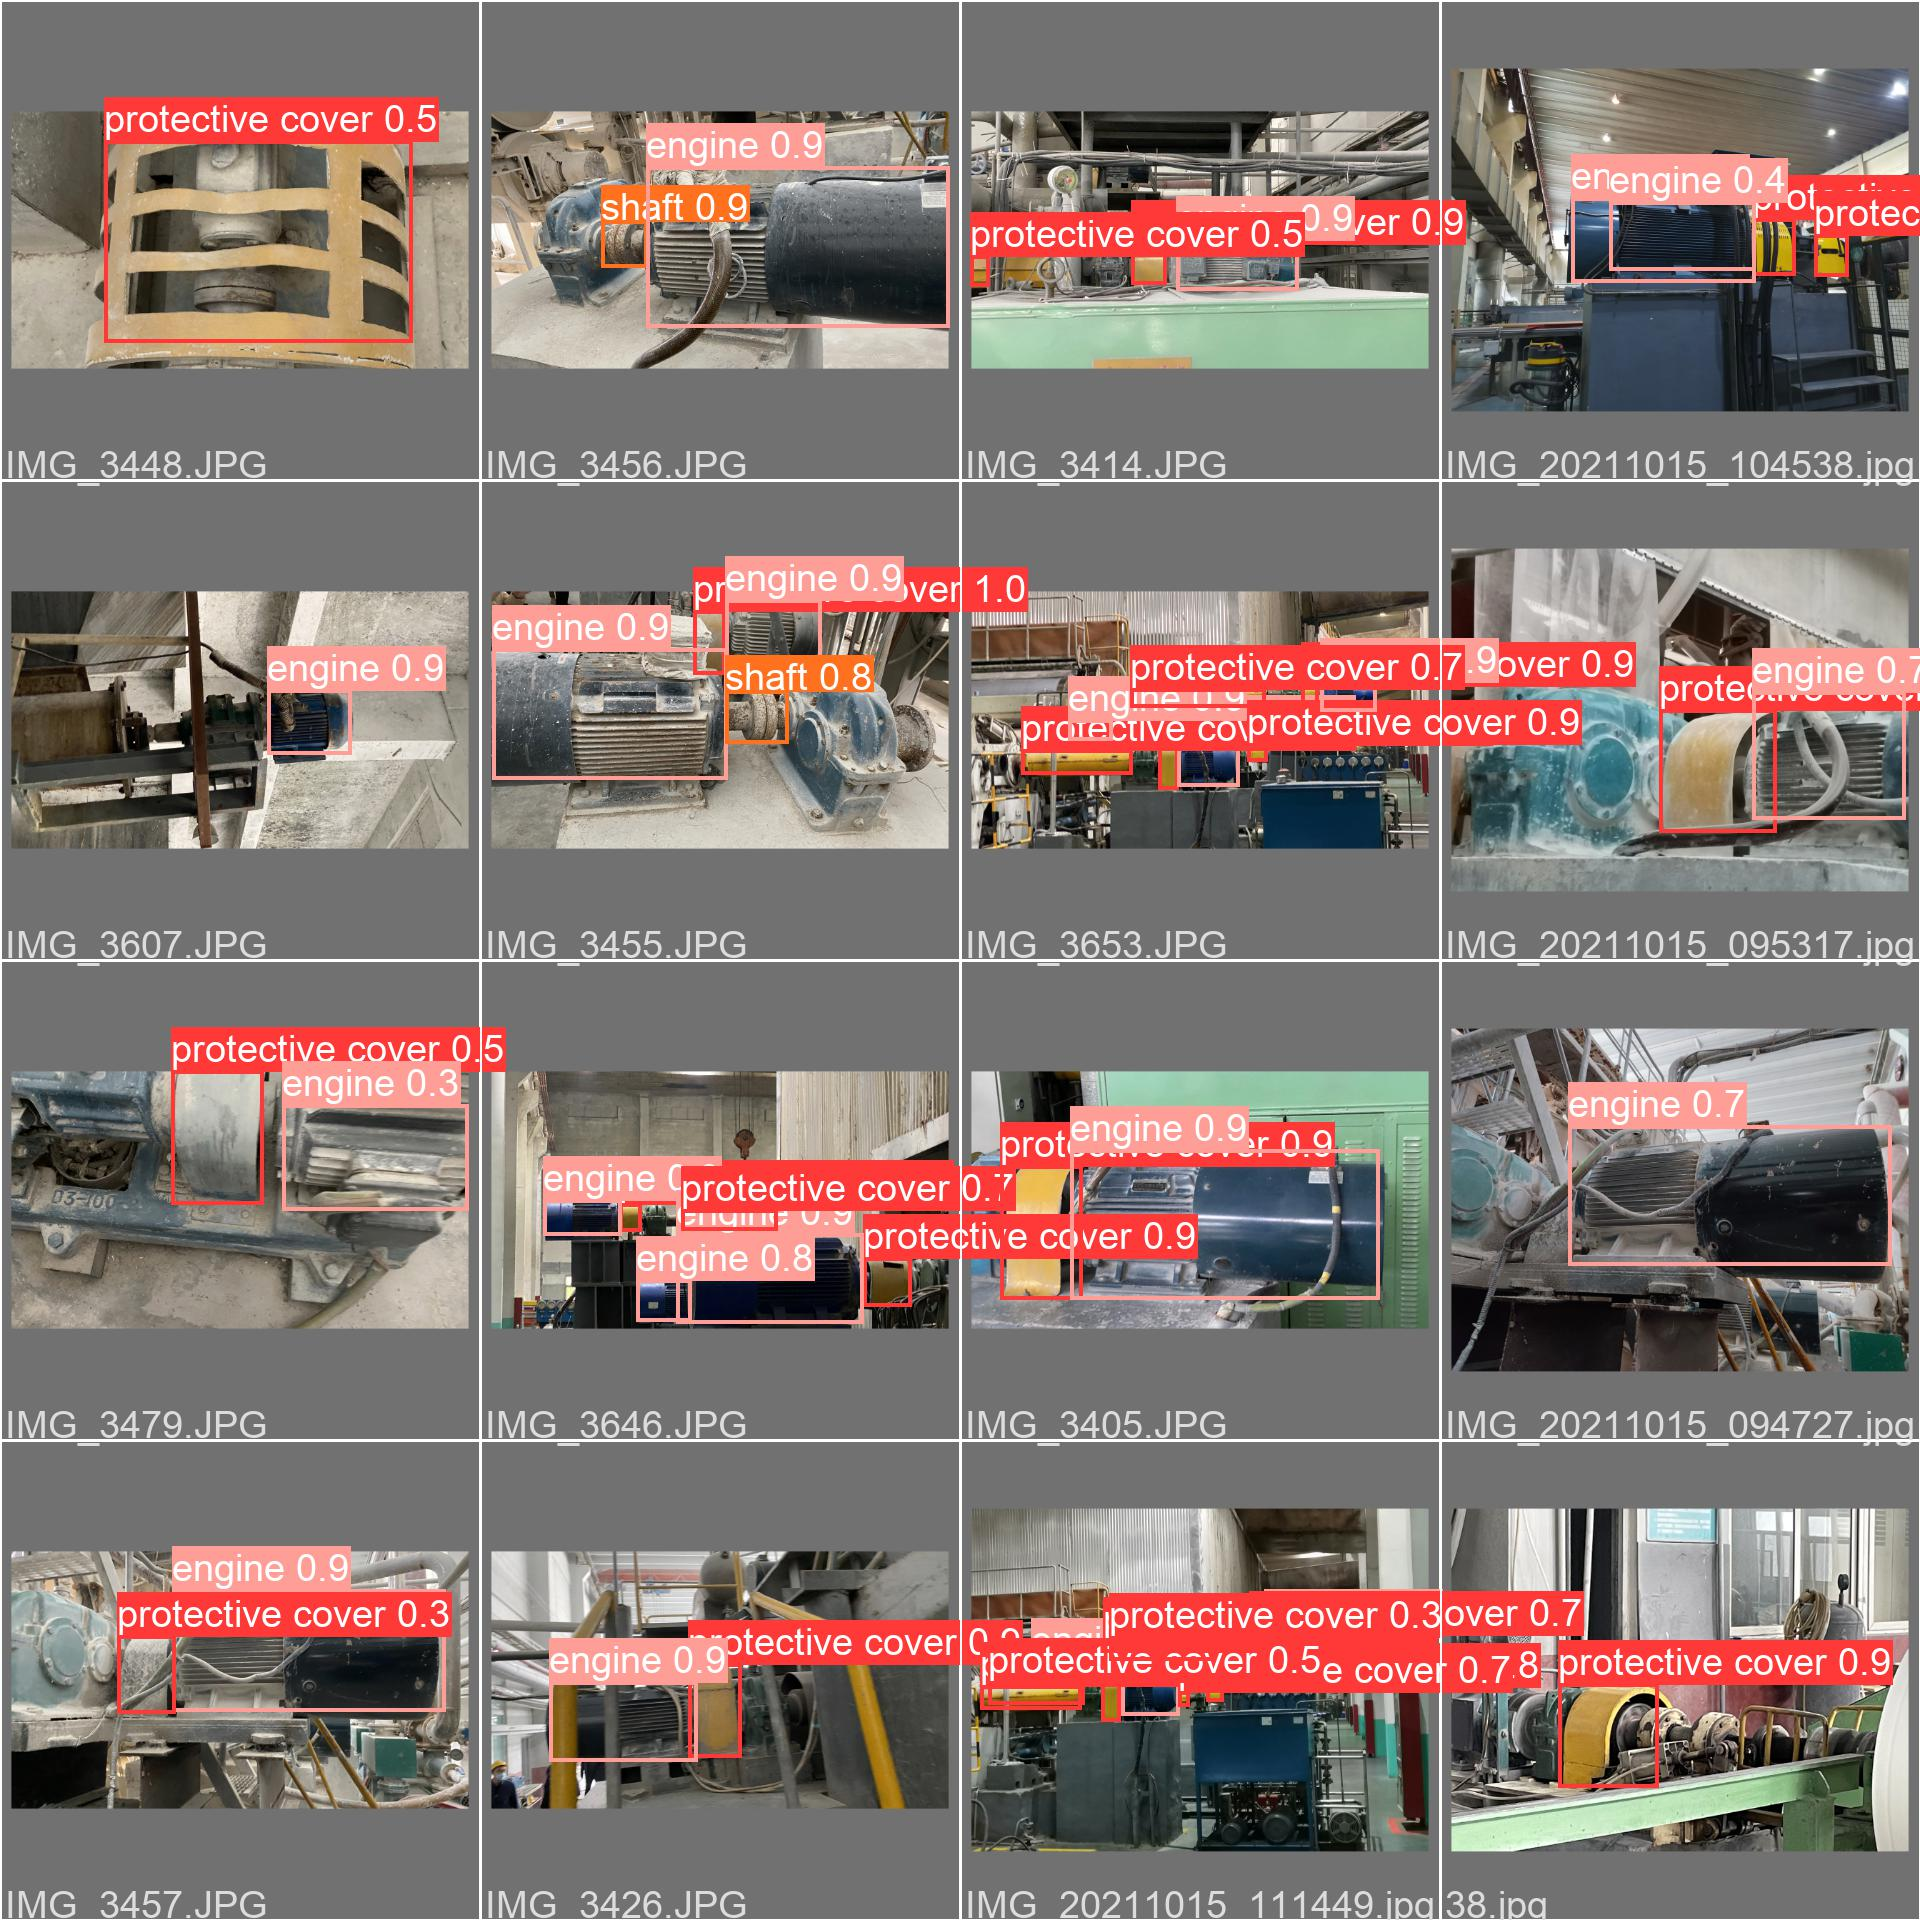

In [ ]:
Image(filename='yolov5/runs/val/exp3/val_batch0_pred.jpg')
# Image(filename='runs/train/exp6/val_batch0_labels.jpg')

# Detect

In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/exp7/weights/last.pt --source ./data/images/val/

detect: weights=['yolov5/runs/train/exp7/weights/last.pt'], source=./data/images/val/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients
image 1/23 /content/data/images/val/15.jpg: 480x640 1 protective cover, 1 engine, 1 shaft, Done. (0.029s)
image 2/23 /content/data/images/val/26.jpg: 480x640 3 protective covers, 1 engine, Done. (0.027s)
image 3/23 /content/data/images/val/38.jpg: 480x640 1 protective cover, Done. (0.027s)
image 4/23 /content/data/images/val/IMG_20211015_094727.jpg: 480x640 1 engine, Done. (0.027s)
image 5/2

In [ ]:
!zip -r exp3.zip yolov5/runs/detect/exp3

  adding: yolov5/runs/detect/exp3/ (stored 0%)
  adding: yolov5/runs/detect/exp3/IMG_3457.JPG (deflated 0%)
  adding: yolov5/runs/detect/exp3/IMG_3653.JPG (deflated 0%)
  adding: yolov5/runs/detect/exp3/IMG_3575.JPG (deflated 0%)
  adding: yolov5/runs/detect/exp3/IMG_3479.JPG (deflated 0%)
  adding: yolov5/runs/detect/exp3/IMG_20211015_095317.jpg (deflated 2%)
  adding: yolov5/runs/detect/exp3/IMG_3454.JPG (deflated 0%)
  adding: yolov5/runs/detect/exp3/IMG_3426.JPG (deflated 0%)
  adding: yolov5/runs/detect/exp3/IMG_3448.JPG (deflated 0%)
  adding: yolov5/runs/detect/exp3/IMG_3455.JPG (deflated 0%)
  adding: yolov5/runs/detect/exp3/IMG_3414.JPG (deflated 0%)
  adding: yolov5/runs/detect/exp3/IMG_20211015_111449.jpg (deflated 2%)
  adding: yolov5/runs/detect/exp3/IMG_3607.JPG (deflated 0%)
  adding: yolov5/runs/detect/exp3/IMG_20211015_104538.jpg (deflated 2%)
  adding: yolov5/runs/detect/exp3/38.jpg (deflated 0%)
  adding: yolov5/runs/detect/exp3/IMG_3456.JPG (deflated 0%)
  adding: y